Decision Tree

Tiatnic Survival Dataset

In [229]:
#Import the Necessary Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Load the data sets- train and test 

In [7]:
df = pd.read_csv("train_titanic.csv")

In [233]:
#Look at top values of train data 

In [234]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [235]:
#Print the column names of train data

In [236]:
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [237]:
#Print the dimension of train and test data

In [238]:
df.shape

(891, 12)

In [239]:
#Print the number of missing values in each column of train and test data

In [240]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

In [241]:
#Barchart of Survived, Pclass, Sex, Embarked

In [1]:
survived = df["Survived"].value_counts()
sns.barplot(x=survived.index, y=survived.values)
plt.xticks([0,1],["not survied","survied"])


NameError: name 'df' is not defined

In [243]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', capsize=0, err_kws=None, ci=<deprecated>, errcolor=<deprecated>, errwidth=<deprecated>, ax=None, **kwargs)
    Show point estimates and errors as rectangular bars.
    
    A bar plot represents an aggregate or statistical estimate for a numeric
    variable with the height of each rectangle and indicates the uncertainty
    around that estimate using an error bar. Bar plots include 0 in the
    axis range, and they are a good choice when 0 is a meaningful value
    for the variable to take.
    
    See the :ref:`tutorial <categorical_tutorial>` for more information.
    
    .. note::
   

<Axes: xlabel='Pclass'>

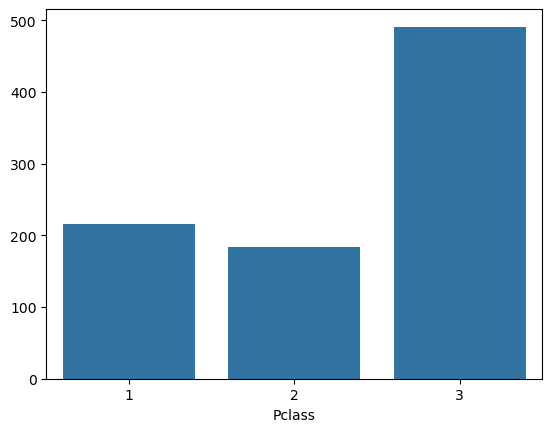

In [244]:
pclass = df["Pclass"].value_counts()
sns.barplot(x=pclass.index, y=pclass.values)



In [245]:
#Histogram of Age, Parch, Fare

<Axes: xlabel='Age', ylabel='Count'>

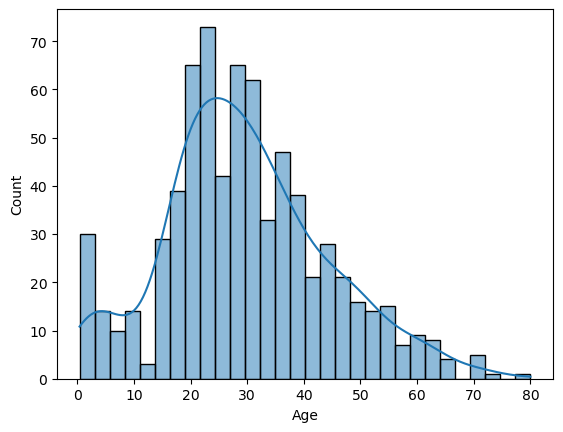

In [246]:
age = df["Age"].value_counts()
sns.histplot(df["Age"],kde=True,bins=30)

<Axes: xlabel='Parch', ylabel='Count'>

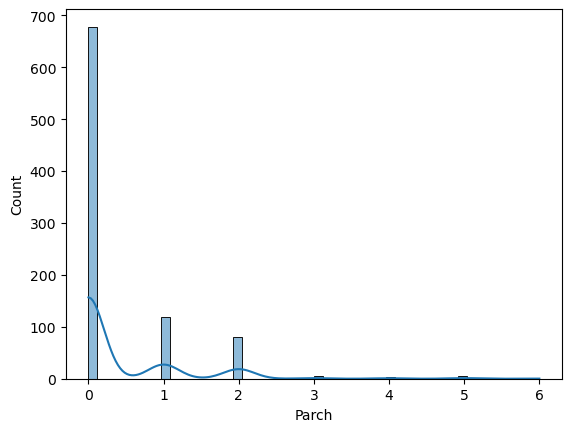

In [247]:
age = df["Parch"].value_counts()
sns.histplot(df["Parch"],kde=True,bins=50)

<Axes: xlabel='Fare', ylabel='Count'>

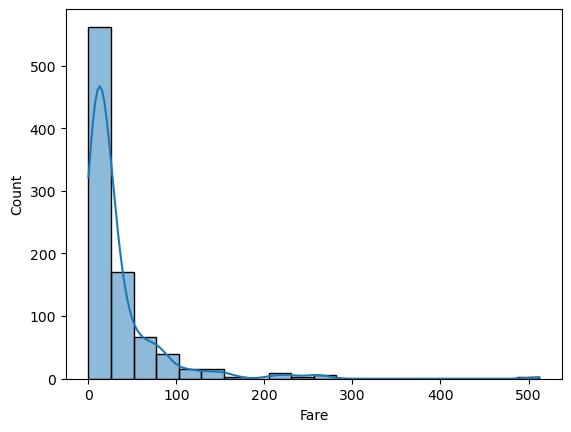

In [248]:
age = df["Fare"].value_counts()
sns.histplot(df["Fare"],kde=True,bins=20)

In [249]:
#Plot histogram of age for survived and did not survived class

(0.0, 400.0)

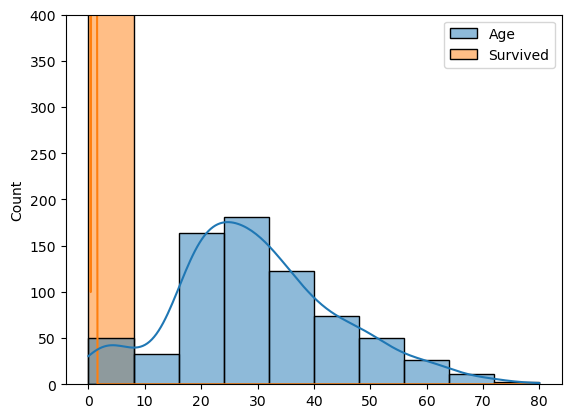

In [250]:
age_survival = df[["Age", "Survived"]].dropna()
sns.histplot(age_survival,kde=True,bins=10)
plt.ylim(0,400)

In [251]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers

<Axes: xlabel='Passenger Class', ylabel='Survival Rate'>

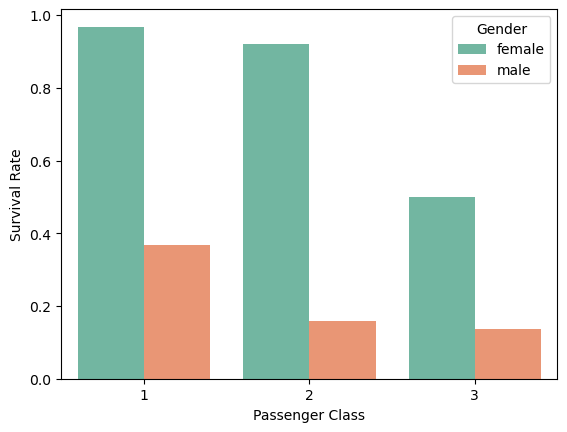

In [252]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



# Drop rows with missing values in relevant columns
Age_wise = df.dropna(subset=['Sex', 'Pclass', 'Survived'])

# Calculate survival rate
survival_rate = Age_wise.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

# Rename for clarity
survival_rate.columns = ['Passenger Class', 'Gender', 'Survival Rate']


sns.barplot(data=survival_rate, x='Passenger Class', y='Survival Rate', hue='Gender', palette='Set2')



In [253]:
#Age wise Distribution of Male and Female passengers

(0.0, 200.0)

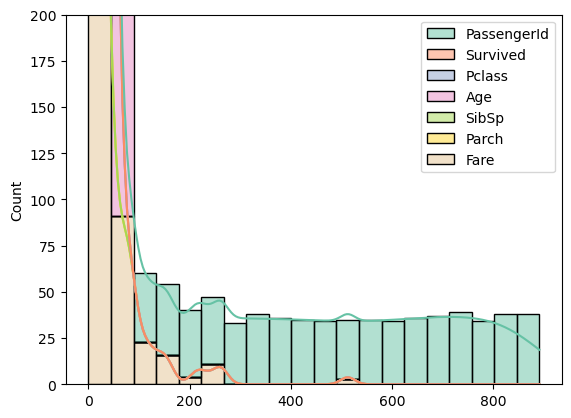

In [254]:
age_wise = df.dropna(subset=['Age', 'Sex'])

# Plot histogram
sns.histplot(data=age_wise, bins=20, kde=True, multiple='stack', palette='Set2')
plt.ylim(0,200)

#

In [255]:
#Histogram of Age of the given data set(sample)

## Handling Missing Values

In [256]:
#Replace the msiing values in Embarked column by 'S'


In [257]:
df["Embarked"].fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [258]:
#Impute the missing values in Fare column with median value
df["Fare"].fillna(df["Fare"].median())

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [259]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data

In [260]:
std = np.std(df['Age'])
mean= np.mean(df["Age"])
n= df["Age"].isna().sum()
random_ages = np.random.normal(loc=mean, scale=std, size=n)
df.loc[df["Age"].isnull(), "Age"] = random_ages
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    14.840068
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

## Feature Engineering - Creating new features

In [261]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1

In [262]:
df["FamilySize"]= df["Parch"] + df["SibSp"] +1
df["FamilySize"]

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [263]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False

In [264]:
df["IsAlone"] =df["FamilySize"]==1
df["IsAlone"]

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: IsAlone, Length: 891, dtype: bool

## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [265]:
df["Cabin"] = df["Cabin"].isnull()
df["Cabin"]

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [266]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin

In [267]:
df=df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)


## Model Building

In [268]:
#Prepare X and y

In [269]:
X= df.iloc[:, 1:]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,male,22.000000,1,0,7.2500,S,2,False
1,1,female,38.000000,1,0,71.2833,C,2,False
2,3,female,26.000000,0,0,7.9250,S,1,True
3,1,female,35.000000,1,0,53.1000,S,2,False
4,3,male,35.000000,0,0,8.0500,S,1,True
...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,1,True
887,1,female,19.000000,0,0,30.0000,S,1,True
888,3,female,14.840068,1,2,23.4500,S,4,False
889,1,male,26.000000,0,0,30.0000,C,1,True


In [270]:
y= df.iloc[:,0]

In [271]:
# Label encoding of categorical features

In [272]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X["Sex"] = encoder.fit_transform(X["Sex"])
X["Embarked"] = encoder.fit_transform(X["Embarked"])
X["IsAlone"] = encoder.fit_transform(X["IsAlone"])

In [273]:
# concat df_categorical with original df

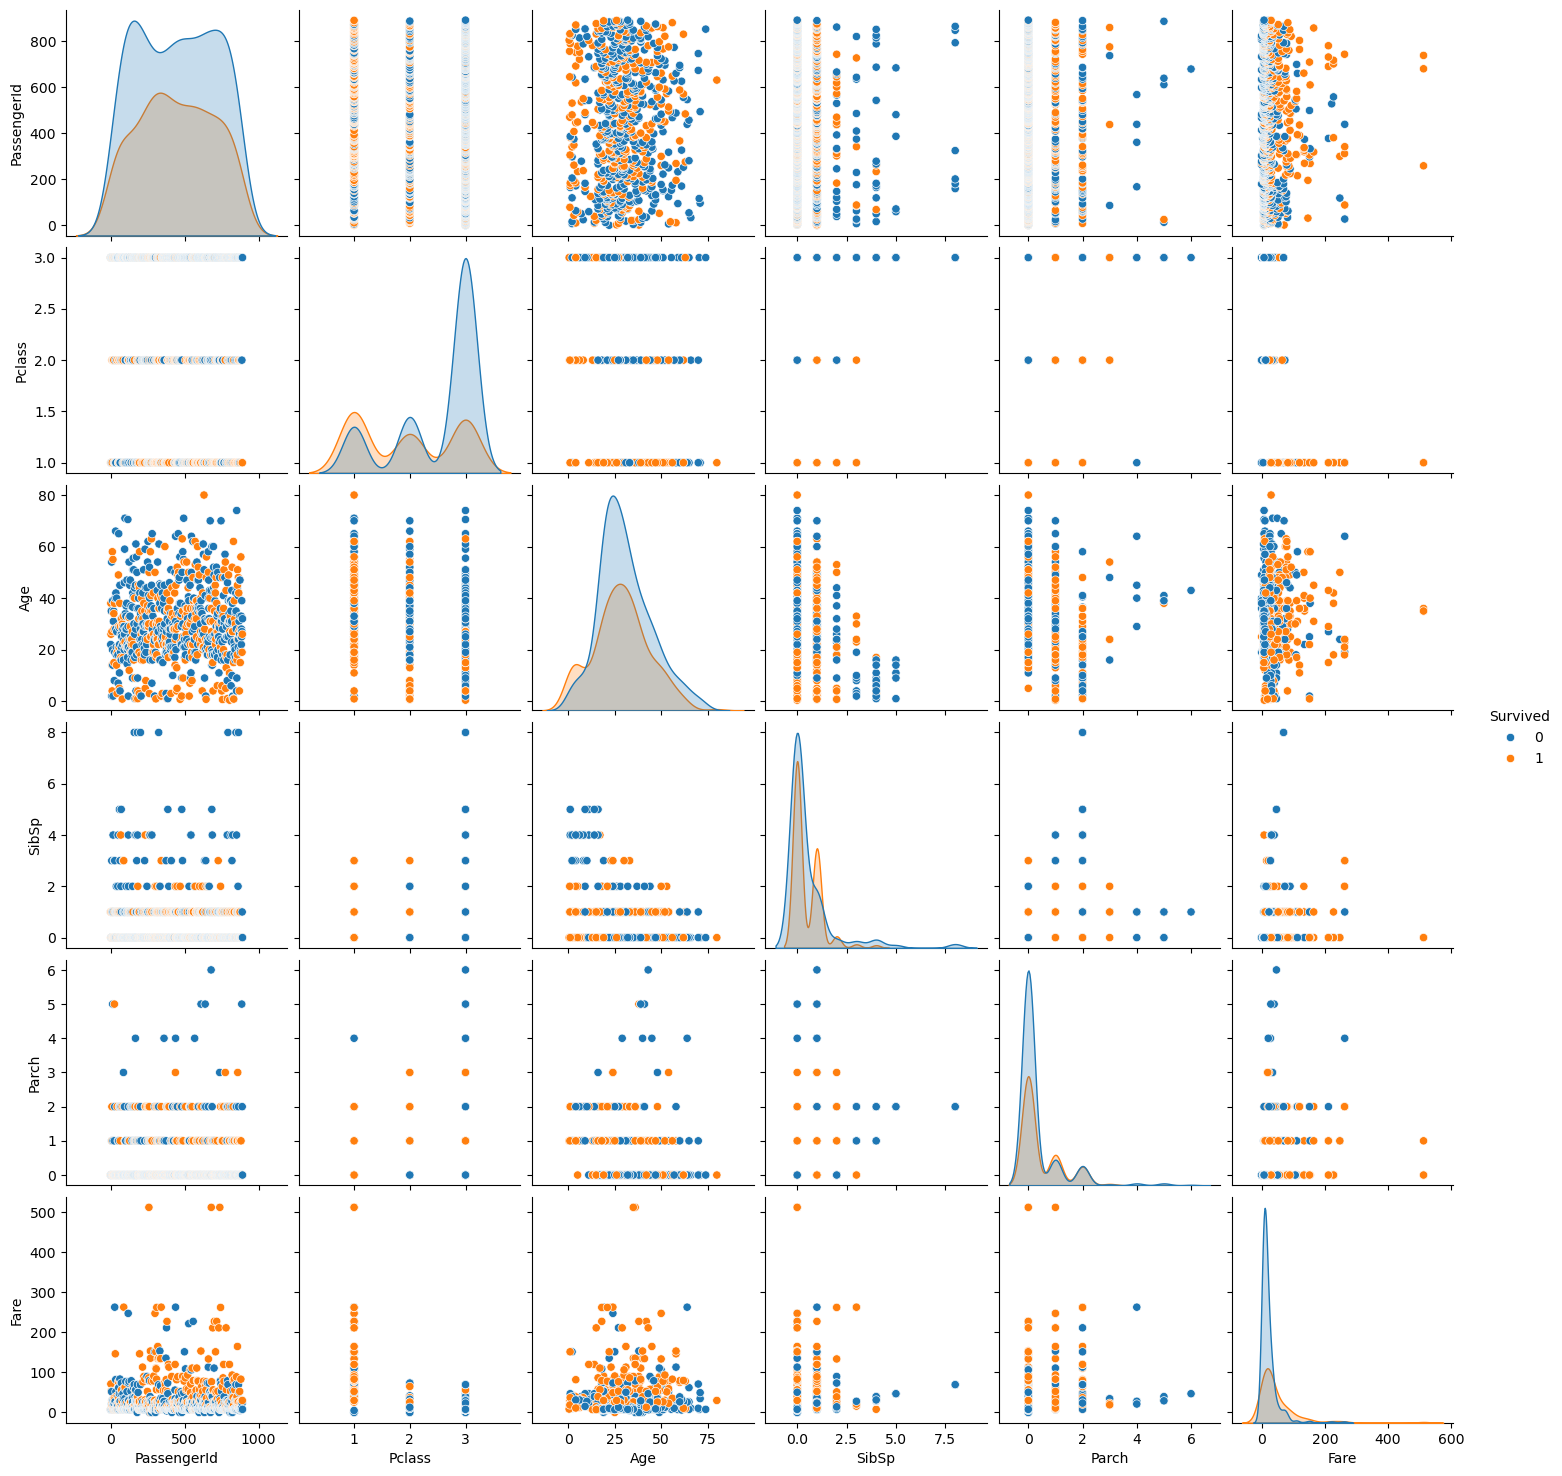

In [8]:
#Do a pairplot of all features
import seaborn as sns 
sns.pairplot(df, hue="Survived")

In [275]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,1,22.000000,1,0,7.2500,2,2,0
1,1,0,38.000000,1,0,71.2833,0,2,0
2,3,0,26.000000,0,0,7.9250,2,1,1
3,1,0,35.000000,1,0,53.1000,2,2,0
4,3,1,35.000000,0,0,8.0500,2,1,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2,1,1
887,1,0,19.000000,0,0,30.0000,2,1,1
888,3,0,14.840068,1,2,23.4500,2,4,0
889,1,1,26.000000,0,0,30.0000,0,1,1


In [276]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation


In [277]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42)

In [278]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library

In [279]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [280]:
#Print the tree

# Importing required packages for visualization


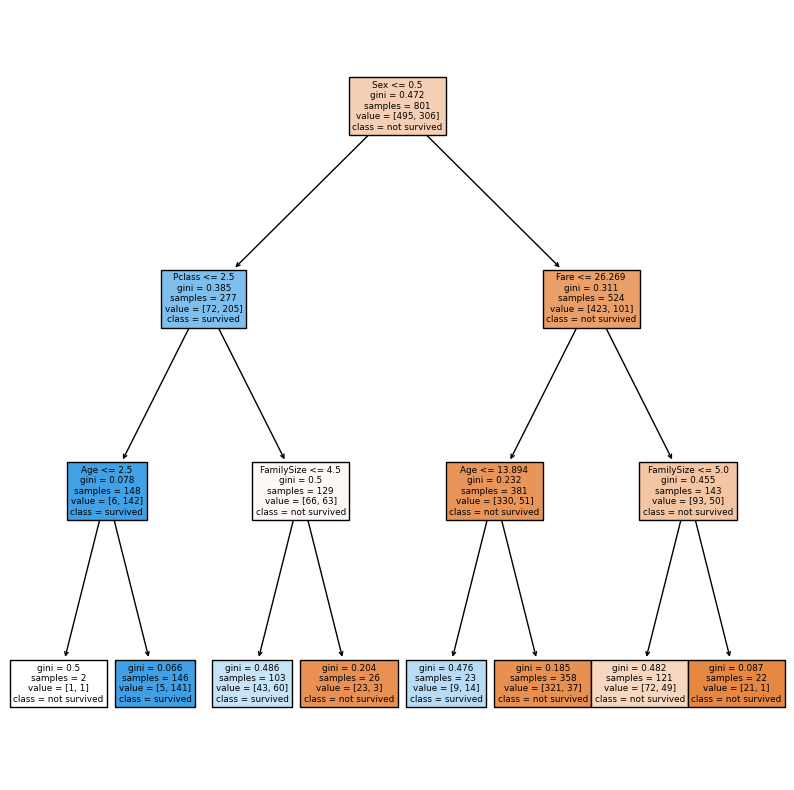

In [281]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(tree,feature_names=X.columns,class_names=["not survived", "survived"],filled=True)
plt.show()

In [282]:
# plotting tree with max_depth=3

<img src="tree2.png">

In [283]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report

In [285]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the validation set
y_pred = tree.predict(X_test)

# Compute and print the Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Print Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[45  9]
 [ 8 28]]

Accuracy: 0.8111

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        54
           1       0.76      0.78      0.77        36

    accuracy                           0.81        90
   macro avg       0.80      0.81      0.80        90
weighted avg       0.81      0.81      0.81        90



In [284]:
# Printing confusion matrix and accuracy

In [286]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[45  9]
 [ 8 28]]
